## Matrisedynamikk (MIP 10.9)

In [1]:
try:
    import python_linear_algebra
except:
    !pip install python_linear_algebra@git+https://github.com/mbr085/python_linear_algebra
    import python_linear_algebra
    

In [2]:
import numpy as np
from python_linear_algebra.matrix_reduction import skriv_ut_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import skriv_ut_numpy_egenvektorer_og_multiplikasjon_med_matrise
from python_linear_algebra.matrix_reduction import finn_egenvektorer_og_egenverdier
from python_linear_algebra.matrix_reduction import gauss_jordan

Dette kan vi få vite av chatgpt:

Et eksempel på **populasjonsdynamikk i kjemi** oppstår i **laserkjemi**, spesielt i samspillet mellom molekyler og lys. Et kjent tilfelle er **vibrasjons- eller elektronisk populasjonsdynamikk i eksiterte tilstander**.  

---

### **Eksempel: Populasjonsdynamikk i laserindusert fluorescens (LIF)**  
Når et molekyl absorberer en foton fra en laser, blir det eksitert til en høyere elektronisk eller vibrasjonsmessig tilstand. Populasjonen av molekyler i den eksiterte tilstanden utvikler seg over tid på grunn av:

1. **Spontan emisjon** – Molekylet går tilbake til grunntilstanden ved å sende ut en foton.  
2. **Stimuleret emisjon** – En annen foton med samme energi kan indusere molekylet til å sende ut lys.  
3. **Ikke-radiativ relaksasjon** – Molekylet mister energi uten å sende ut lys (f.eks. via kollisjoner eller intern konvertering).  

**Rate-ligningene** som beskriver disse overgangene, er et eksempel på **populasjonsdynamikk** i kjemi. Dette modelleres ofte ved hjelp av **Boltzmann-fordelingen** eller **rate-ligninger som Einstein-koeffisientene**.  

Denne typen populasjonsdynamikk er avgjørende for å forstå **reaksjonskinetikk, spektroskopi og fotokjemi**.

I en **diskret tidsversjon** av populasjonsdynamikk bruker vi en **Markov-prosess**, der populasjonene ved steg \( t+1 \) avhenger av populasjonene ved steg \( t \) gjennom en **overgangsmatrise**.  

---

### **Diskret tids populasjonsdynamikk med en overgangsmatrise**  
Vi 
uttrykker populasjonsutviklingen som:  

$$
\vec v(t+1) = A \cdot \vec v(t)
$$

hvor:

- $ \vec v(t) = \begin{bmatrix} v_g(t) \\ v_e(t) \end{bmatrix} $ representerer populasjonene ved tidspunkt $ t $.
- $ A $ er **overgangsmatrisen**, som bestemmer hvordan populasjonene endrer seg mellom tidssteg.

Et enkelt valg for $ A $ er:

$$
A = \begin{bmatrix} 
1 - p & q \\ 
p & 1 - q 
\end{bmatrix}
$$

hvor:
- $ p $ er sannsynligheten for overgang fra grunntilstanden til den eksiterte tilstanden per tidssteg.
- $ q $ er sannsynligheten for overgang fra den eksiterte tilstanden til grunntilstanden per tidssteg.

---

En **likevektstilstand**, er en tilstand $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix}$ slik at

$$
A \cdot \vec w = \vec w
$$

For å finne likevektstilstandene løser vi:
$$
\begin{bmatrix} 
1 - p & q \\ 
p & 1 - q 
\end{bmatrix}
\begin{bmatrix} w_g \\ w_e \end{bmatrix}
=
\begin{bmatrix} w_g \\ w_e \end{bmatrix}.
$$

Det vil si at vi søker en egenvektor $\vec w$ til $A$ med egenverdi $1$. Derfor rekkereuserer vi

$$A - 1\cdot I = 
\begin{bmatrix} 
1 - p & q \\ 
p & 1 - q 
\end{bmatrix} -
\begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}
=
\begin{bmatrix} -p & q \\ p & -q \end{bmatrix}
\sim
\begin{bmatrix} p & -q \\ 0 & 0 \end{bmatrix}
.
$$

Her er andre parameter $w_e$ fri, og $pw_g - qw_e = 0$ slik at 
$$\frac{w_e}{w_g} = \frac{p}{q}$$

La oss sette inn tall

In [3]:
p = 0.2 # (20 % av molekylene går til eksitert tilstand per steg).
q = 0.5 # (50 % av molekylene slapper av tilbake per steg).

A = np.array([
    [1 - p, q],
    [p, 1 - q]
])

In [4]:
skriv_ut_egenvektorer_og_multiplikasjon_med_matrise(A, finn_egenvektorer_og_egenverdier(A))

Alle vektorer her skal leses som kolonnevektorer

egenverdi:      0.3
egenvektor:     [-1.  1.]
A @ evenvektor: [-0.3  0.3]

egenverdi:      1.0
egenvektor:     [2.5 1. ]
A @ evenvektor: [2.5 1. ]



Egenwektoren $\vec w = \begin{bmatrix}w_g \\ w_e\end{bmatrix} =  \begin{bmatrix}2.5 \\ 1\end{bmatrix}$ til egenverdien $1$ for $A$ har som forutsakt
$$\frac{w_e}{w_g} = \frac{1}{2.5} = \frac{20}{50} = \frac{q}{p}.$$

La $\vec u = \begin{bmatrix}-1 \\ 1\end{bmatrix}$ være egenvektoren til egenverdien $0.3$ for $A$ som vi fant ovenfor.

Hvis $\vec v(0) = \vec w$, da er 
$\vec v(1) = A \cdot \vec v(0) = A \cdot \vec w = 1 \cdot \vec w = \vec w = \vec v(0)$. Derfor er også 
$$\vec v(2) = A \cdot \vec v(1) = A \cdot \vec v(0) = \vec v(0).$$
Fortsetter vi slik ser vi at $\vec v(t) = \vec v(0)$ for $t = 0, 1, 2, \dots$


Hvis $\vec v(0) = \vec u$, da er 
$\vec v(1) = A \cdot \vec v(0) = A \cdot \vec u = 0.3 \cdot \vec w = 0.3 \cdot \vec v(0)$. Videre er 
$$\vec v(2) = A \cdot \vec v(1) = A \cdot (0.3 \cdot \vec v(0)) = 0.3 \cdot (A \cdot v(0)) = 0.3 \cdot (0.3 \cdot \vec v(0)) = (0.3)^2 \cdot \vec v(0).$$
Fortsetter vi slik ser vi at $\vec v(t) = (0.3)^t \cdot \vec v(0)$ for $t = 0, 1, 2, \dots$



I allmindelighet vet vi at $v(t) = A^t \cdot v(0)$ for $t = 0, 1, 2, \dots$. (Hvorfor vet vi det?)

#### Eksempel

La oss si at $v(0) = \begin{bmatrix}1000\\0\end{bmatrix}$. Da får vi

In [5]:
v_0 = np.array([[1000],[0]])

In [6]:
v_1 = A @ v_0
v_1

array([[800.],
       [200.]])

In [7]:
v_2 = A @ v_1
v_2

array([[740.],
       [260.]])

In [8]:
v_3 = A @ v_2
v_3

array([[722.],
       [278.]])

In [9]:
v_4 = A @ v_3
v_4

array([[716.6],
       [283.4]])

In [10]:
v_5 = A @ v_4
v_5

array([[714.98],
       [285.02]])

La oss lage en liste av tillstander og plotte med antall tidssteg lang x-aksen

In [11]:
def populasjons_utvikling(overgangsmatrise, initial_tilstand, antall_steg):
    y = [initial_tilstand]
    for _ in range(antall_steg):
        y.append(overgangsmatrise @ y[-1])
    return np.array(y)

In [12]:
y = populasjons_utvikling(A, v_0, 7)

In [13]:
import matplotlib.pyplot as plt

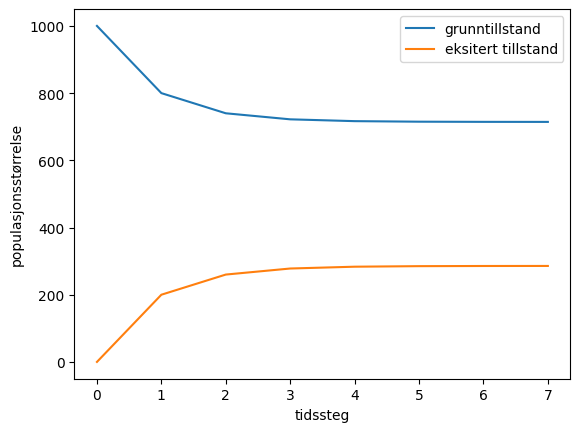

In [14]:
plt.plot(y[:, 0], label='grunntillstand')
plt.plot(y[:, 1], label='eksitert tillstand')
plt.xlabel('tidssteg')
plt.ylabel('populasjonsstørrelse')
plt.legend()

### **Iterasjon av populasjonsdynamikken**  

Med en initialpopulasjon $ \vec v(0) $ kan vi beregne fremtidige populasjoner som:

$$
\vec v(t) = A^t \cdot \vec v(0)  \qquad \text{(hvorfor er det sant?)}
$$

La oss sjekke at $\vec v(5) = A^5 \cdot \vec v(0)$:

In [15]:
v_5, np.linalg.matrix_power(A, 5) @ v_0

(array([[714.98],
        [285.02]]),
 array([[714.98],
        [285.02]]))

La oss se på $\vec v(10)$ og $\vec v(100)$:

In [16]:
np.linalg.matrix_power(A, 10) @ v_0

array([[714.2874014],
       [285.7125986]])

In [17]:
np.linalg.matrix_power(A, 100) @ v_0

array([[714.28571429],
       [285.71428571]])

De er jo nesten kliss like. La oss se om det går an å forklare det.

La oss tenke oss at vi kan skrive $\vec v(0)$ på formen $\vec v(0) = x \vec u + y \vec w$. Da blir
$$\vec v(1) = A \cdot \vec v(0) = A \cdot(x \vec u + y \vec w) = A \cdot (x \vec u) + A \cdot(y \vec w) = x A \cdot \vec u + y A \cdot \vec w = 0.3 \cdot x \cdot \vec u + y \cdot \vec w.$$

For $t = 0,1,2, \dots$ blir
$$\vec v(t) = A^t \cdot \vec v(0) = A^t \cdot(x \vec u + y \vec w) = A^t \cdot (x \vec u) + A^t \cdot(y \vec w) = x A^t \cdot \vec u + y A^t \cdot \vec w = (0.3)^t \cdot x \cdot \vec u + y \cdot \vec w.$$

Når $t$ blir stor blir tallet $(0.3)^t$ veldig liten, så $\vec(t)$ blir nesten lik $y \cdot \vec w$.

For $\vec v(0) = \begin{bmatrix}1000\\0\end{bmatrix}$, er det da mulig å finne $x$ og $y$ slik at $\vec v(0) = x \vec u + y \vec w$?

Uttrykket $\vec v(0) = x \vec u + y \vec w$ kan skrives som ligningssystemet
$$
\begin{array}{rcrcr}
-x &+& 2.5\cdot y &=& 1000\\
x &+& y &=& 0
\end{array}
$$

Dette kan vi løse med Gauss Jordan eliminasjon

In [18]:
M = np.array([
    [-1, 2.5, 1000],
    [1, 1, 0]
])

In [19]:
gauss_jordan(M)

array([[   1.        ,    0.        , -285.71428571],
       [   0.        ,    1.        ,  285.71428571]])

La oss lese ut $x$ og $y$ gitt i siste kolonne:

In [20]:
x, y = gauss_jordan(M)[:, -1]

In [21]:
x, y

(np.float64(-285.7142857142857), np.float64(285.7142857142857))

La oss dobbelsjekke at $\vec v(0) = x \vec u + y \vec w$

In [22]:
u = np.array([[-1],[1]])
w = np.array([[2.5], [1]])
v_0, x*u + y*w

(array([[1000],
        [   0]]),
 array([[1000.],
        [   0.]]))

In [23]:
np.allclose(v_0, x*u + y*w)

True

La oss sjekke at $\vec v(4) = (0.3)^4 \cdot x \cdot \vec u + y \cdot \vec w$

In [24]:
v_4, (0.3)**4*x*u + y*w

(array([[716.6],
        [283.4]]),
 array([[716.6],
        [283.4]]))

In [25]:
np.allclose(v_4, (0.3)**4*x*u + y*w)

True

In [26]:
t = 10

In [27]:
np.allclose(np.linalg.matrix_power(A, t) @ v_0, (0.3)**t *x*u + y*w)

True

In [28]:
t = 100

In [29]:
np.allclose(np.linalg.matrix_power(A, t) @ v_0, (0.3)**t *x*u + y*w)

True

## Oppgave

Gjenta regningene over for $p = 0.3$ og $q = 0.8$. Finn egenvektorene for hånd, og finn tallene svarende til $x$ og $y$ ovenfor for hånd!

In [30]:
p2 = 0.3 # (20 % av molekylene går til eksitert tilstand per steg).
q2 = 0.8 # (50 % av molekylene slapper av tilbake per steg).

A2 = np.array([
    [1 - p2, q2],     
    [p2, 1 - q2]
])